In [1]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [2]:
cat4=cv2.imread("C:/AI_New/3-CNN/PetImages/Cat/4.jpg")
cat4=cv2.cvtColor(cat4,cv2.COLOR_BGR2RGB)

In [3]:
cat4.shape

(375, 500, 3)

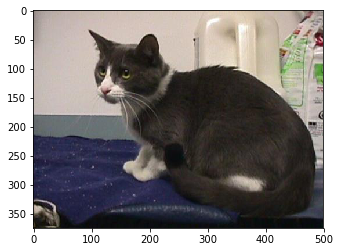

In [4]:
plt.imshow(cat4)

In [5]:
dog2=cv2.imread("C:/AI_New/3-CNN/PetImages/Dog/2.jpg")
dog2=cv2.cvtColor(dog2,cv2.COLOR_BGR2RGB)

In [6]:
dog2.shape

(199, 188, 3)

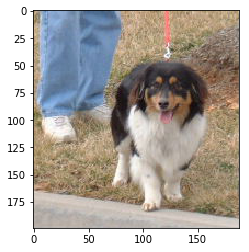

In [7]:
plt.imshow(dog2)

<h4><b>Image Manipulation</h4></b>

Its usually a good idea to manipulate the images with rotation, resizing, and scaling so the model becomes 
more robust to different images that our data set doesn't have. We can use the ImageDataGenerator to do this 
automatically for us.

In [8]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [9]:
image_gen = ImageDataGenerator(
    rotation_range=30, # Rotate the image by 30 degrees
    width_shift_range=0.1, # Shift the image horizontally by 10% of the width
    height_shift_range=0.1, # Shift the image vertically by 10% of the height
    rescale=1/255, # Rescale the image by normalizing pixel values to the range [0, 1]
    shear_range=0.2, # Shear the image by 20%, which distorts the image by cutting away parts
    zoom_range=0.2, # Zoom in on the image by up to 20%
    horizontal_flip=True, # Allow horizontal flipping of the image
    fill_mode='nearest' # Fill in missing pixels after transformations with the nearest pixel value
)

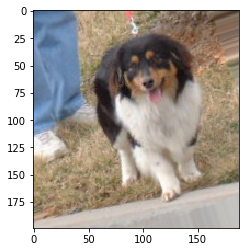

In [10]:
plt.imshow(image_gen.random_transform(dog2))

In [11]:
image_gen.flow_from_directory("C:/AI_New/3-CNN/CATS_DOGS/CATS_DOGS/train")

Found 18743 images belonging to 2 classes.


In [12]:
image_gen.flow_from_directory("C:/AI_New/3-CNN/CATS_DOGS/CATS_DOGS/test")

Found 6251 images belonging to 2 classes.


## Resizing images

#### Lets have Keras resize all the images to 150 pixels by once they have been manipulated

In [13]:
image_shape=(150,150,3)

### Creating a model

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [15]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(150,150,3),activation='relu',))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=(150,150,3),activation='relu',))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=(150,150,3),activation='relu',))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

In [16]:
# Add a fully connected (Dense) layer with 128 units
model.add(Dense(128))

# Add a ReLU activation function
model.add(Activation('relu'))

# Dropout helps reduce overfitting by randomly turning off neurons during training
# Here we randomly turn off 50% of neurons
model.add(Dropout(0.5))

# Output layer with 1 unit for binary classification (e.g., cat vs. dog)
model.add(Dense(1))

# Add a sigmoid activation function for binary classification
model.add(Activation('sigmoid'))

# Compile the model with binary crossentropy loss and Adam optimizer
model.compile(loss='binary_crossentropy', 
              optimizer="adam",
              metrics=['accuracy'])

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0         
__________

In [19]:
# Assuming image_gen is an instance of ImageDataGenerator
batch_size=16
train_image_gen = image_gen.flow_from_directory(
    'C:/AI_New/3-CNN/CATS_DOGS/CATS_DOGS/train',  # Directory containing the images
    target_size=image_shape[:2],       # Resize images to match the target size
    batch_size=batch_size,             # Number of images to return in each batch
    class_mode='binary'                # Mode for labels: 'binary' for binary classification
)

# image_gen is likely an instance of the ImageDataGenerator class from Keras.
# This class provides a way to generate batches of tensor image data with real-time data augmentation.
# The flow_from_directory method is used to load images from a directory in a structured way.
# target_size=image_shape[:2]: Resize the images to match the specified target size.

Found 18743 images belonging to 2 classes.


In [20]:
test_image_gen = image_gen.flow_from_directory(
    'C:/AI_New/3-CNN/CATS_DOGS/CATS_DOGS/test',  # Directory containing the images
    target_size=image_shape[:2],       # Resize images to match the target size
    batch_size=batch_size,             # Number of images to return in each batch
    class_mode='binary'                # Mode for labels: 'binary' for binary classification
)


Found 6251 images belonging to 2 classes.


In [21]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [22]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
result=model.fit_generator(train_image_gen,epochs=10,
                          steps_per_epoch=15,
                          validation_data=test_image_gen,
                          validation_steps=12
                          )

Epoch 1/10
15/15 [==============================] - 40s 3s/step - loss: 0.7353 - acc: 0.5167 - val_loss: 0.6903 - val_acc: 0.5521
Epoch 2/10
15/15 [==============================] - 42s 3s/step - loss: 0.6962 - acc: 0.5000 - val_loss: 0.6925 - val_acc: 0.5260
Epoch 3/10
15/15 [==============================] - 44s 3s/step - loss: 0.6882 - acc: 0.5792 - val_loss: 0.6927 - val_acc: 0.4896
Epoch 4/10
15/15 [==============================] - 33s 2s/step - loss: 0.6907 - acc: 0.5458 - val_loss: 0.6881 - val_acc: 0.5521
Epoch 5/10
15/15 [==============================] - 36s 2s/step - loss: 0.7024 - acc: 0.4708 - val_loss: 0.6909 - val_acc: 0.5312
Epoch 6/10
15/15 [==============================] - 35s 2s/step - loss: 0.6916 - acc: 0.5250 - val_loss: 0.6896 - val_acc: 0.5052
Epoch 7/10
15/15 [==============================] - 34s 2s/step - loss: 0.6656 - acc: 0.5667 - val_loss: 0.6851 - val_acc: 0.5417
Epoch 8/10
15/15 [==============================] - 34s 2s/step - loss: 0.6985 - acc: 0.56

In [ ]:
result.history["acc"]

In [ ]:
plt.plot(results.history['acc'])